# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
api_key

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [ ]:
cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
weather_data=[]
x=0
for city in cities:
    try:
        x=x+1
        key_val_pairs = {'City':'','Cloudiness':'','Country':'','Date':'','Humidity':'','Lat':'','Lng':'','Max Temp':'','Wind Speed':''}
        response = requests.get(query_url + city).json()

        if (response['cod'] != "404" and response['cod'] != "500"):   
#             key_val_pairs['City'] = response['name']
#             key_val_pairs['Cloudiness'] = response['clouds']['all']
#             key_val_pairs['Country'] = response['sys']['country']
#             key_val_pairs['Date'] = response['dt']
#             key_val_pairs['Humidity'] = response['main']['humidity']
#             key_val_pairs['Lat'] = response['coord']['lat']
#             key_val_pairs['Lng'] = response['coord']['lng']
#             key_val_pairs['temp'] = response['main']['temp_max']
#             key_val_pairs['Wind Speed'] = response['wind']['speed']
            weather_data.append(response)
            print(f"Processing Record {x} of {len(cities)} | {city}")
        else:
            print(f"Processing Record {x} of {len(cities)} | {city} not found... skipping")
    
    except:
        print(f"Processing Record {x} of {len(cities)} | Timeout...skipping {city}")

print(f"\n----------------------------------------------------\nData Retrieval Complete.\n----------------------------------------------------")


Processing Record 1 of 589 | whitehorse
Processing Record 2 of 589 | busselton
Processing Record 3 of 589 | upernavik
Processing Record 4 of 589 | cherskiy
Processing Record 5 of 589 | hurghada not found... skipping
Processing Record 6 of 589 | prado
Processing Record 7 of 589 | puerto ayora
Processing Record 8 of 589 | el alto
Processing Record 9 of 589 | taolanaro not found... skipping
Processing Record 10 of 589 | lebu
Processing Record 11 of 589 | lompoc
Processing Record 12 of 589 | bethel
Processing Record 13 of 589 | mar del plata
Processing Record 14 of 589 | ust-nera
Processing Record 15 of 589 | methoni
Processing Record 16 of 589 | marcona not found... skipping
Processing Record 17 of 589 | rikitea
Processing Record 18 of 589 | miguel hidalgo
Processing Record 19 of 589 | palau
Processing Record 20 of 589 | kodiak
Processing Record 21 of 589 | new norfolk
Processing Record 22 of 589 | port lincoln
Processing Record 23 of 589 | tual
Processing Record 24 of 589 | zanjan
Proces

Processing Record 196 of 589 | baghdad
Processing Record 197 of 589 | vao
Processing Record 198 of 589 | san cristobal
Processing Record 199 of 589 | illoqqortoormiut not found... skipping
Processing Record 200 of 589 | victoria
Processing Record 201 of 589 | sambava
Processing Record 202 of 589 | castro
Processing Record 203 of 589 | hilo
Processing Record 204 of 589 | avera
Processing Record 205 of 589 | pitimbu
Processing Record 206 of 589 | asau not found... skipping
Processing Record 207 of 589 | muros
Processing Record 208 of 589 | progreso
Processing Record 209 of 589 | maamba
Processing Record 210 of 589 | port hedland
Processing Record 211 of 589 | derzhavinsk
Processing Record 212 of 589 | la ronge
Processing Record 213 of 589 | orlik
Processing Record 214 of 589 | abiy adi not found... skipping
Processing Record 215 of 589 | red bluff
Processing Record 216 of 589 | rocha
Processing Record 217 of 589 | havre-saint-pierre
Processing Record 218 of 589 | ilulissat
Processing Rec

Processing Record 390 of 589 | tocopilla
Processing Record 391 of 589 | lamu
Processing Record 392 of 589 | dashitou
Processing Record 393 of 589 | grand gaube
Processing Record 394 of 589 | wiang sa
Processing Record 395 of 589 | zlatoustovsk not found... skipping
Processing Record 396 of 589 | merritt island
Processing Record 397 of 589 | pesca
Processing Record 398 of 589 | dabakala
Processing Record 399 of 589 | sumbawa not found... skipping
Processing Record 400 of 589 | yuncheng
Processing Record 401 of 589 | velikodvorskiy
Processing Record 402 of 589 | sembe not found... skipping
Processing Record 403 of 589 | jipijapa
Processing Record 404 of 589 | bandarbeyla
Processing Record 405 of 589 | kresttsy
Processing Record 406 of 589 | gushikawa
Processing Record 407 of 589 | khormuj not found... skipping
Processing Record 408 of 589 | haverfordwest
Processing Record 409 of 589 | vila velha
Processing Record 410 of 589 | airai
Processing Record 411 of 589 | markova
Processing Record

Processing Record 583 of 589 | bukachacha
Processing Record 584 of 589 | kannur
Processing Record 585 of 589 | ketchikan
Processing Record 586 of 589 | bentiu not found... skipping
Processing Record 587 of 589 | tsienyane not found... skipping
Processing Record 588 of 589 | sindi
Processing Record 589 of 589 | puerto baquerizo moreno

----------------------------------------------------
Data Retrieval Complete.
----------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data

[{'coord': {'lon': -135.06, 'lat': 60.72},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'stations',
  'main': {'temp': 41,
   'pressure': 1017,
   'humidity': 65,
   'temp_min': 41,
   'temp_max': 41},
  'visibility': 64372,
  'wind': {'speed': 13.87, 'deg': 180},
  'clouds': {'all': 20},
  'dt': 1539885600,
  'sys': {'type': 1,
   'id': 3963,
   'message': 0.0036,
   'country': 'CA',
   'sunrise': 1539877895,
   'sunset': 1539913056},
  'id': 6180550,
  'name': 'Whitehorse',
  'cod': 200},
 {'coord': {'lon': 115.35, 'lat': -33.64},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 56.38,
   'pressure': 1028.09,
   'humidity': 100,
   'temp_min': 56.38,
   'temp_max': 56.38,
   'sea_level': 1029.18,
   'grnd_level': 1028.09},
  'wind': {'speed': 18.9, 'deg': 241.001},
  'clouds': {'all': 56},
  'dt': 1539889376,
  'sys': {'me

In [8]:
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
city_lats = []
city_lngs = []
country = []
date = []
city_name = []

[city_name.append(weather_data[x]['name']) for x in range(len(weather_data))]
[max_temp.append(weather_data[x]['main']['temp_max']) for x in range(len(weather_data))]
[humidity.append(weather_data[x]['main']['humidity']) for x in range(len(weather_data))]
[cloudiness.append(weather_data[x]['clouds']['all']) for x in range(len(weather_data))]
[wind_speed.append(weather_data[x]['wind']['speed']) for x in range(len(weather_data))]
[city_lats.append(weather_data[x]['coord']['lat']) for x in range(len(weather_data))]
[city_lngs.append(weather_data[x]['coord']['lon']) for x in range(len(weather_data))]
[country.append(weather_data[x]['sys']['country']) for x in range(len(weather_data))]
[date.append(weather_data[x]['dt']) for x in range(len(weather_data))]

df = pd.DataFrame({ "City" : city_name,
                    "Cloudiness" : cloudiness,
                    "Country" : country,
                    "Date" : date,
                    "Humidity (%)" : humidity,
                    "Latitude" : city_lats,
                    "Longitude" : city_lngs,
                    "Max Temp" : max_temp,
                    "Wind Speed" : wind_speed,
                  }).set_index("City")

# Export to csv
df.to_csv("output.csv")
df.head()

,Cloudiness,Country,Date,Humidity (%),Latitude,Longitude,Max Temp,Wind Speed
City,,,,,,,,
Whitehorse,20,CA,1539885600,65,60.72,-135.06,41.00,13.87
Busselton,56,AU,1539889376,100,-33.64,115.35,56.38,18.90
Upernavik,76,GL,1539889377,100,72.79,-56.15,24.52,6.38
Cherskiy,8,RU,1539889377,65,68.75,161.30,3.28,2.24
Prado,32,BR,1539889378,98,-17.34,-39.22,77.44,11.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

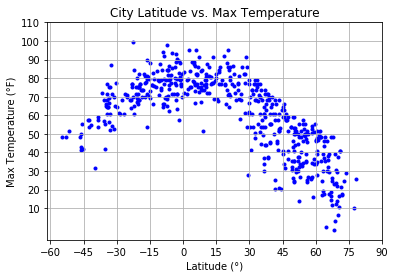

In [10]:
plt.scatter(df['Latitude'],df['Max Temp'], color = "b", marker=".")
plt.grid()
plt.xlabel("Latitude (°)")
plt.ylabel("Max Temperature (°F)")
plt.xticks(np.arange(-60,91,15))
plt.yticks(np.arange(10,111,10))
plt.title('City Latitude vs. Max Temperature')
plt.savefig("latitude vs temperature.png")

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot